# Diego Macieski ID_2024238

# Statistical Techniques for Data Analysis and Probability

### Table of Contents

1. [**Introduction**  ](#Introduction)
2. [**Task 1: Data Analysis**](#Task-1:-Data-Analysis)
- [**Conclusion of Task 1 - Data Analysis**](#1.3-Conclusion-of-Task-1---Data-Analysis)
3. [**Task 2: Probability (Discrete)**](#2.Task-2---Probability-(Discrete))
- [**Conclusion of Task 2 - Probability (Discrete)**](#2.1-Conclusion-of-Task-2---Probability-(Discrete))
4. [**Task 3: Probability (Continuous)**](#3.Task-3---Probability-(Continuous))
- [**Conclusion of Task 3 - Probability (Continuous)**](#3.1-Conclusion-of-Task-3---Probability-(Continuous))
5. [**References**](#4.-References)


# Introduction

This CA focuses on conducting comprehensive data analysis and applying probability concepts using Python. The main task involves selecting a dataset that contains both categorical and numerical variables, conducting a thorough statistical analysis, and visualizing the findings to derive meaningful insights. Alongside data analysis, the assignment also delves into both discrete and continuous probability concepts, requiring the use of theoretical models in real-world contexts.

# Task 1: Data Analysis

The dataset “Citizenship Applications and Certificates by Year and Nationality” provides information on the number of citizenship applications and certificates issued in Ireland, organized by year and nationality. Published by the Department of Justice, it tracks trends in citizenship applications over time. Certain values may be suppressed for privacy reasons. This dataset helps analyze immigration trends and the naturalization process in Ireland.
link: https://data.gov.ie/dataset/citizenship-applications-and-decisions-by-year-and-nationality

The libraries that will be used are as follows:
- `NumPy:`
NumPy is a library for numerical operations, offering support for large arrays and matrices, with efficient mathematical operations for scientific computing.
- `Pandas:`
Pandas provides data structures like DataFrames, simplifying data manipulation, cleaning, and analysis, particularly useful for large datasets.
- `Matplotlib:`
Matplotlib is a plotting library that creates static and interactive visualizations, such as graphs and charts, to visualize and understand data.

In [1]:
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore") 


## 1.1 Data Preparation

The first step involves cleaning and organising the dataset to ensure it is ready for analysis. This involves handling missing values, removing or imputing them where necessary, checking for and addressing inconsistencies in the data, and converting categorical variables into a format suitable for analysis.

In [2]:
df = pd.read_csv('Citizenship Applications and Certificates by Year and Nationality.csv', encoding='ISO-8859-1')
df.head(5)

,Type,Status,Last Updated,Nationality,2017,2018,2019,2020,2021,2022,2023,2024
0,Citizenship,Received,31/08/2024,Afghanistan,84,101,95,116,158,263,286,80
1,Citizenship,Received,31/08/2024,Åland Islands,0,0,0,0,0,0,0,0
2,Citizenship,Received,31/08/2024,Albania,54,63,50,71,61,105,144,37
3,Citizenship,Received,31/08/2024,Algeria,54,70,51,68,61,80,99,29
4,Citizenship,Received,31/08/2024,American Samoa,0,0,0,0,0,0,0,0


In [3]:
df.shape

(500, 12)

I will check the variable types. In this case, they are 'object'; this means that the columns contain text or mixed data types. Then, I will work to transform them into numbers.

In [4]:
df.dtypes

Type            object
Status          object
Last Updated    object
Nationality     object
2017            object
2018            object
2019            object
2020            object
2021            object
2022            object
2023            object
2024            object
dtype: object

The isnull().sum() function will be used to check for any missing values in the dataframe "df". This command will display the total number of missing values for each column, helping to identify which columns have null or NaN entries

print(df.isnull().sum())

All variables in the dataset are objects however, starting from the 'Nationality' column, they must be integers as they refer to the number of 'Received' and 'Issued' applications. In the line below, all values ​​after the 'Nationality' column will be transformed into integers, and NA values ​​will be replaced with zero.


In [5]:
columns_to_convert = df.columns[df.columns.get_loc('Nationality') + 1:]

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


In [6]:
df.dtypes

Type            object
Status          object
Last Updated    object
Nationality     object
2017             int64
2018             int64
2019             int64
2020             int64
2021             int64
2022             int64
2023             int64
2024             int64
dtype: object

As seen in df.head(5) at the beginning of the CA, the 'Last Updated' column has the date 08/31/2024; I will check if it has different dates other than this; if not, I will delete it as it will not be helpful in the analysis.

In [7]:
if (df['Last Updated'] == '31/08/2024').all():
    df = df.drop(columns=['Last Updated'])
    print("Column 'Last Updated' has been dropped.")
else:
    print("Column 'Last Updated' contains different dates and will be retained.")

Column 'Last Updated' has been dropped.


I will do the same thing for the 'Type' column because if it only has 'Citizenship' there is nothing to be analyzed

In [8]:
if (df['Type'] == 'Citizenship').all():
    df = df.drop(columns=['Type'])
    print("Column 'Type has been dropped.")
else:
    print("Column 'Type' contains different dates and will be retained.")

Column 'Type has been dropped.


Now I will organize the data frame in alphabetical order of nationality just to have a better view of what was done

In [9]:
# Remover linhas onde todas as colunas de 2017 a 2024 são zero
df = df[(df[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] != 0).any(axis=1)]

In [10]:
df = df.sort_values(by='Nationality')
df.head(16)

,Status,Nationality,2017,2018,2019,2020,2021,2022,2023,2024
498,Issued,*Other,4,0,0,4,0,0,0,0
248,Received,*Other,11,32,25,15,10,7,0,12
250,Issued,Afghanistan,39,36,15,25,81,165,144,72
0,Received,Afghanistan,84,101,95,116,158,263,286,80
252,Issued,Albania,14,26,13,25,57,77,95,70
2,Received,Albania,54,63,50,71,61,105,144,37
253,Issued,Algeria,20,25,8,8,51,88,75,37
3,Received,Algeria,54,70,51,68,61,80,99,29
6,Received,Angola,38,25,23,15,24,24,25,10
256,Issued,Angola,26,16,7,8,19,19,17,11


Now, with the cleaned and organized dataset, we will use the describe function and analyze the year 2017 to gain a better understanding of the data:

	•	Count (281): This indicates the total number of entries available for analysis.
	•	Mean (70.51): The average number of applications, suggesting that on average.
	•	Std (192.82): A high standard deviation indicates significant variability in the data, which suggests that some nationalities have significantly more applications or certificates than others.
	•	Min (0): The minimum value is 0, showing that some nationalities had no applications.
	•	25% (4): 25% of the data has values up to 4, indicating that one-quarter of nationalities had 4 or fewer applications or certificates.
	•	50% (13): The median value is 13, meaning half of the nationalities had 13 or fewer applications or certificates.
	•	75% (43): The 75% is 43, showing that 75% of the values were 43 or less, while the remaining 25% had higher values.
	•	Max (1812): The maximum value of 1812 indicates one country had a significantly high number of applications compared to others.

Based on these insights, we will conduct deeper analyses in the next steps.

In [11]:
df.describe()

,2017,2018,2019,2020,2021,2022,2023,2024
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,70.512456,74.562278,63.676157,58.348754,76.085409,110.039146,143.224199,79.032028
std,192.822107,208.951713,180.491012,153.865338,178.506262,254.611403,349.528718,209.516422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,4.000000,6.000000,8.000000,4.000000
50%,13.000000,14.000000,11.000000,10.000000,18.000000,21.000000,26.000000,15.000000
75%,43.000000,41.000000,39.000000,38.000000,57.000000,83.000000,98.000000,57.000000
max,1812.000000,1806.000000,1742.000000,1168.000000,1195.000000,2205.000000,3418.000000,2161.000000


I will generate several graphs to visualize the dataset and will change the name ‘United Kingdom’ to ‘UK’ for easier interpretation.

In [12]:
df['Nationality'] = df['Nationality'].replace('United Kingdom of Great Britain and Northern Ireland (the)', 'UK')

## 1.2 Graphical analysis

The trend of “Issued” and “Received” Applications Over the Years: Shows the evolution of the number of applications received and issued over time. For example, in the years 2019 and 2020, we experienced a sharp decline in the number of applications, likely caused by the global COVID-19 pandemic, followed by an increase starting in 2021 as the global situation gradually improved.

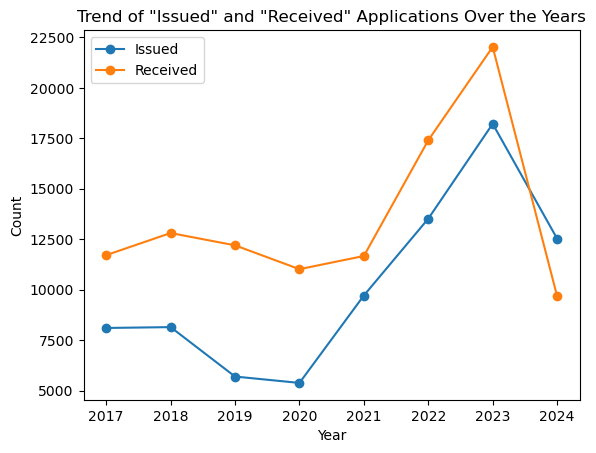

In [13]:
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
issued_counts = df[df['Status'] == 'Issued'][years].sum().values
received_counts = df[df['Status'] == 'Received'][years].sum().values

plt.plot(years, issued_counts, label='Issued', marker='o')
plt.plot(years, received_counts, label='Received', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend of "Issued" and "Received" Applications Over the Years')
plt.legend()
plt.show()

Top 5 Nationalities with the Highest Total Applications (Issued and Received): India, the UK, and Poland are leading the ranking, considering the data from 2017 to 2024.

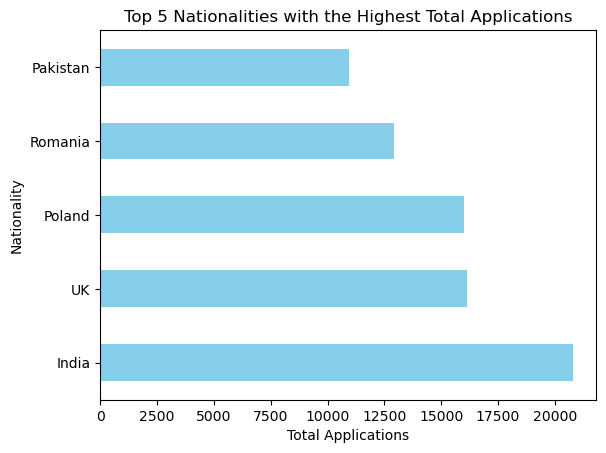

In [14]:
df['Total_Applications'] = df[years].sum(axis=1)

top_5_nationalities = df.groupby('Nationality')['Total_Applications'].sum().nlargest(5)

top_5_nationalities.plot(kind='barh', color='skyblue')
plt.xlabel('Total Applications')
plt.ylabel('Nationality')
plt.title('Top 5 Nationalities with the Highest Total Applications')
plt.show()

Proportion of Status per Year: Comparison between issued and received over the years.

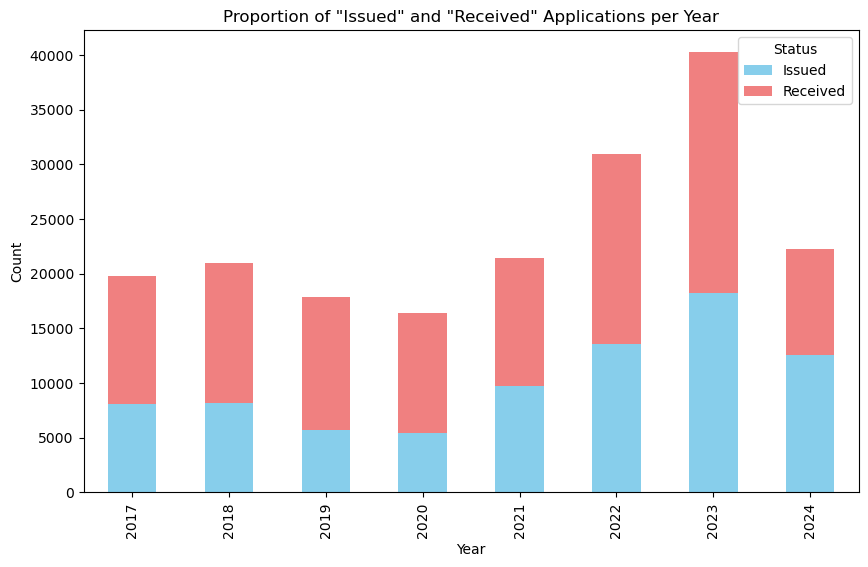

In [15]:
status_counts_per_year = df.groupby('Status')[years].sum()

status_counts_per_year.T.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'lightcoral'])
plt.title('Proportion of "Issued" and "Received" Applications per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

Top 3 Nationalities for Each Year: nationalities with the most 'Issued' per year

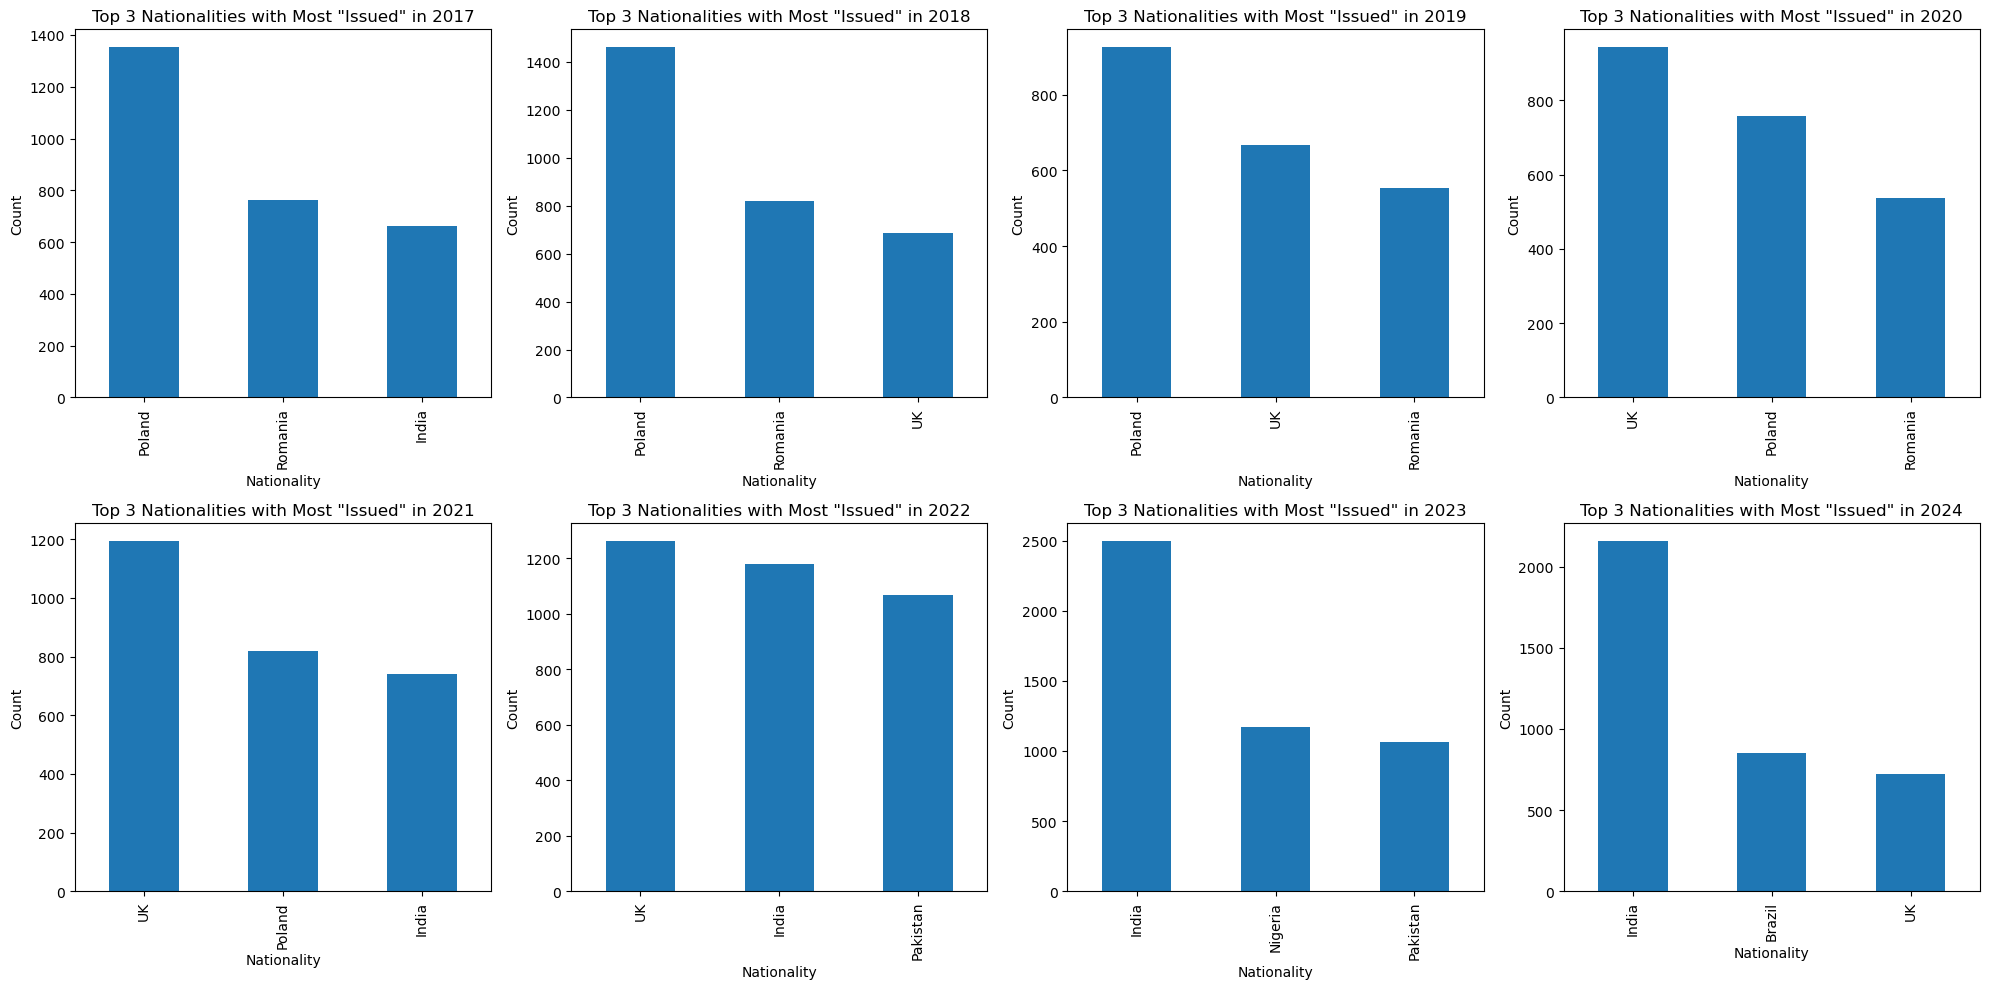

In [16]:
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10)) 
axes = axes.flatten() 

for i, year in enumerate(years):
    top_3_nationalities = df[df['Status'] == 'Issued'].groupby('Nationality')[year].sum().nlargest(3)
    top_3_nationalities.plot(kind='bar', ax=axes[i], title=f'Top 3 Nationalities with Most "Issued" in {year}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

I will now focus on the year 2024 and select the top 5 countries with the highest number of Issued applications

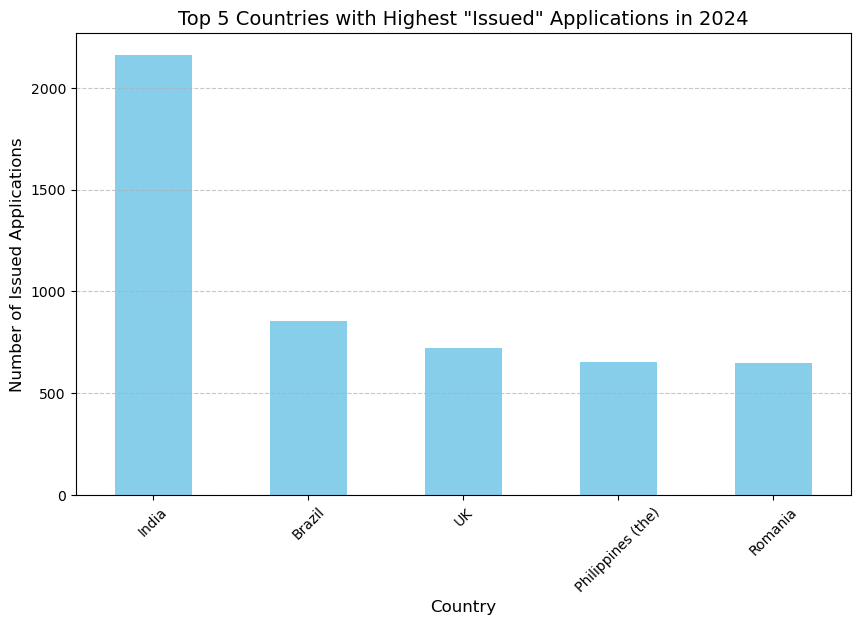

In [17]:
top_5_issued_2024 = df[df['Status'] == 'Issued'].groupby('Nationality')['2024'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
top_5_issued_2024.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest "Issued" Applications in 2024', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Issued Applications', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Absolute Frequency: Total number of Issued applications from the Top 5 countries in 2024.

In [18]:
freq_absolute_2024 = df[df['Status'] == 'Issued'][['Nationality', '2024']].groupby('Nationality').sum()

top_5_absolute_2024 = freq_absolute_2024.nlargest(5, '2024')

print("Absolute Frequency (Top 5 'Issued' Nationalities in 2024):")
print(top_5_absolute_2024)

Absolute Frequency (Top 5 'Issued' Nationalities in 2024):
                   2024
Nationality            
India              2161
Brazil              855
UK                  724
Philippines (the)   653
Romania             646


Relative Frequency: It calculates the proportion of these applications in relation to the total of all nationalities, allowing us to see the participation of each one. India (17.2%), Brazil (6.8%), the UK (5.8%), the Philippines (5.2%), and Romania (5.2%) lead in 2024, while the remaining nationalities account for 59.8%.

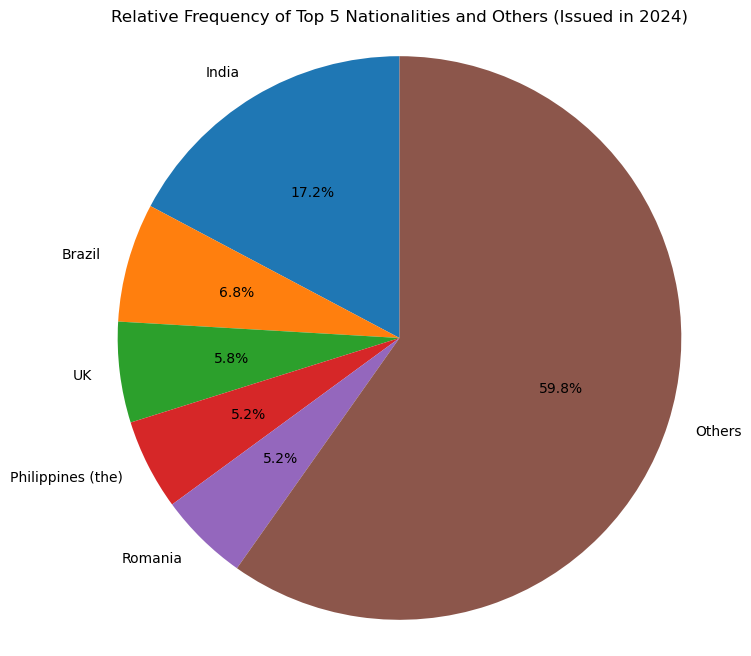

In [19]:
total_issued_2024 = df[df['Status'] == 'Issued']['2024'].sum()
freq_relative_2024 = df[df['Status'] == 'Issued'][['Nationality', '2024']].groupby('Nationality').sum() / total_issued_2024

top_5_nationalities = freq_relative_2024.nlargest(5, '2024')

others = freq_relative_2024[~freq_relative_2024.index.isin(top_5_nationalities.index)]
others_sum = others['2024'].sum()

combined_data = top_5_nationalities.copy()
combined_data.loc['Others'] = others_sum

plt.figure(figsize=(8, 8))
plt.pie(combined_data['2024'], labels=combined_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Relative Frequency of Top 5 Nationalities and Others (Issued in 2024)')
plt.axis('equal')
plt.show()

## 1.3 Conclusion of Task 1 - Data Analysis

This report presents an analysis of a dataset related to citizenship applications in Ireland, focusing on applications and certificates issued by year and nationality. The dataset, sourced from [Data Gov](https://data.gov.ie/dataset/citizenship-applications-and-decisions-by-year-and-nationality), provided a diverse set of categorical and numerical variables, fulfilling the requirements outlined in Task 1.

Key steps included:
- **Data Cleaning and Preparation**: Ensured that the dataset was structured and ready for analysis.
- **Graphical Summaries**: Created visualizations to track trends over the years, emphasizing the number of applications and certificates issued by nationality.
- **Statistical Measures**: Utilized appropriate statistical techniques to examine distributions and relationships between variables.

The data analysis revealed several important insights, such as the countries with the highest number of 'Issued' applications and the countries with the most applications (both issued and received) over the years. Notably, Brazil emerged as the second-largest country in 2024, becoming the first Latin American country to rank in the Top 3, highlighting how immigration patterns have been shifting over time.

# 2.Task 2 - Probability (Discrete)

- ### What is the probability of rolling exactly two 6s in five rolls of a fair die?

Follow by:

	•	n = 5 (number of rolls)
	•	p = 1/6(probability of rolling a 6 per throw)
	•	q = 1 - 1/6 (probability of not rolling a 6)
	•	k = 2 (number of desired successes)

After these values are used in the binomial distribution formula to calculate the probability of obtaining a fixed number of successes in a fixed number of independent experiments.

The code `math import comb` imports the comb function from the math library in Python. The comb function is used to calculate the number of possible combinations of a set of items, it calculates the binomial coefficient.

In [20]:
from math import comb

n = 5
p = 1/6
q = 1 - p
k = 2

# Binomial Distribution
probability = comb(n, k) * (p**k) * (q**(n-k))

probability_percentage = probability * 100

print(f"The probability of rolling exactly two 6s in five rolls is: {probability_percentage:.2f}%")

The probability of rolling exactly two 6s in five rolls is: 16.08%


Now I'm going to draw a graph to explain it a little better.

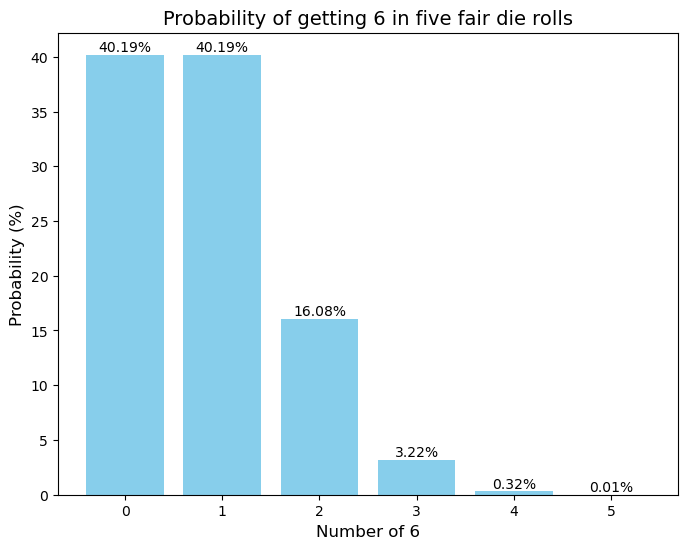

In [21]:
n = 5  
p = 1/6  
q = 1 - p 

probabilities = []
k_values = list(range(n + 1))  

for k in k_values:
    probability = comb(n, k) * (p**k) * (q**(n-k))
    probabilities.append(probability * 100) 

plt.figure(figsize=(8, 6))
bars = plt.bar(k_values, probabilities, color='skyblue')

for bar, prob in zip(bars, probabilities):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{prob:.2f}%', ha='center', va='bottom')

plt.title('Probability of getting 6 in five fair die rolls', fontsize=14)
plt.xlabel('Number of 6', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)

plt.show()

Explaining:

	0 six: There is about a 40.19% chance of getting no 6 in 5 rolls. This makes sense because the probability of rolling a 6 is a relatively low 1/6 so it's quite likely you won't roll one.
	1 six: There is also about a 40.19% chance of getting exactly one 6 in 5 rolls. This is another very likely outcome, as we are only talking about a single 6 in five rolls.
	2 sixes: The chance of getting exactly two 6s is 16.08%, which is significantly lower than the chances of getting 0 or 1. Getting two 6s in 5 rolls is still possible, but less frequent.
	3 sixes: Now, the probability of getting three 6s drops to 3.22%, which is already very unlikely. Three 6s in five rolls is a pretty rare combination.
	4 sixes: The chance of getting four 6s is even lower, just 0.32%. The probability of hitting four 6s in five tries is very low.
	5 sixes: Finally, the probability of getting five 6s is extremely small, just 0.01%. It is practically impossible for all five rolls to result in a 6.


The highest probabilities are for 0 or 1 6, with approximately 40% each. The chances of getting two 6s decrease to about 16%, and getting three or more 6s is very rare, with the probabilities quickly dropping to very low numbers.

- ### The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability that in a particular week there will be no more than two accidents.

The Poisson distribution is a statistical model used to describe the probability of a given number of events occurring in a fixed interval of time or space, under the condition that these events happen at a known average rate and are independent of each other. The rate of 0.75 in a Poisson distribution represents the average number of industrial injuries that occur in a work week in a factory. This means that on average you can expect 0.75 accidents to occur per week. In practical terms, this indicates that some weeks may have zero or one accident, while others may have more than one, but overall, the average number is 0.75.

The code `math imports` the math module in Python, which provides a collection of mathematical functions and constants.

In [22]:
import math

lambda_value = 0.75

def poisson_probability(k, lambda_value):
    return (math.exp(-lambda_value) * (lambda_value ** k)) / math.factorial(k)

prob_0 = poisson_probability(0, lambda_value)
prob_1 = poisson_probability(1, lambda_value)
prob_2 = poisson_probability(2, lambda_value)

total_probability = prob_0 + prob_1 + prob_2

print(f"The probability of having no more than two accidents in a week is: {total_probability * 100:.2f}%")

The probability of having no more than two accidents in a week is: 95.95%


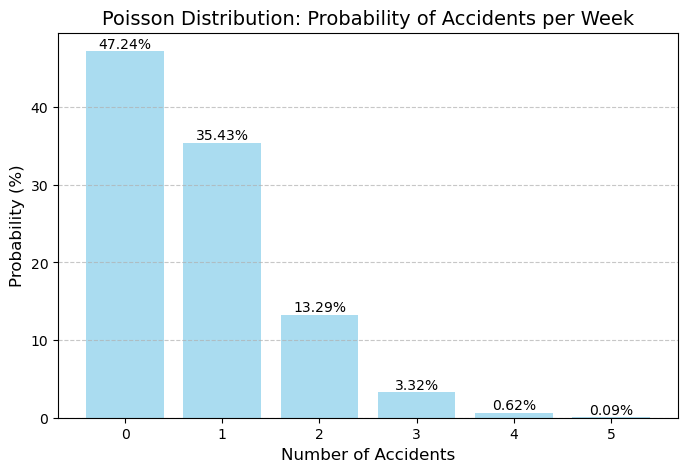

In [23]:
k_values = list(range(6))  # k values from 0 to 5
probabilities = [poisson_probability(k, lambda_value) for k in k_values]

percentages = [prob * 100 for prob in probabilities]

plt.figure(figsize=(8, 5))
plt.bar(k_values, percentages, color='skyblue', alpha=0.7)

plt.title('Poisson Distribution: Probability of Accidents per Week', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)

for i, prob in enumerate(percentages):
    plt.text(i, prob, f'{prob:.2f}%', ha='center', va='bottom')

plt.xticks(k_values) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Explaining:

    0 accidents (k = 0):
	• Probability: 47.24%
	• High chance of no accident occurring.
	1 accident (k = 1):
	•Probability: 35.43%
	•Considerable chance of exactly one accident occurring.
	2 accidents (k = 2):
	•Probability: 13.29%
	•Less likely, but still possible.
	3 accidents (k = 3):
	•Probability: 3.32%
	•Rare occurrence, given the average.
	4 accidents (k = 4):
	•Probability: 0.62%
	•Very rare to have four accidents in one week.
	5 accidents (k = 5):
	•Probability: 0.09%
	•Extremely unlikely.

To calculate the probability that a maximum of two accidents will occur in a week, we need to consider that the number of accidents cannot exceed two. Therefore, we are analyzing the following situations:

	• No accidents (0) = 47.24%
	• One accident (1) = 35.43%
	• Two accidents (2) = 13.29% 

 The sum of these probabilities will result in a 95.95% probability of not having more than two accidents in a week.

## 2.1 Conclusion of Task 2 - Probability (Discrete)
The probability of getting exactly two sixes in five throws of a fair die was calculated using the binomial probability formula. Furthermore, the number of industrial injuries in a factory was analyzed using the Poisson distribution, determining the probability of a maximum of two accidents occurring in a week.

With graphic assistance, it became easier to understand the calculations, and the examples presented of discrete probability illustrate situations in real contexts, which contributes to the development of logical reasoning.


# 3.Task 3 - Probability (Continuous)

The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a
standard deviation of 10 minutes.
Using this distribution, answer the following:
### - If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting the zoo.

The code `import scipy.stats` as stats imports the stats module from the SciPy library, which provides a wide range of statistical functions and tools.

- mean = in minutes
- std_dev = in minutes
- x = Value to find the probability for

In [24]:
import scipy.stats as stats

mean = 90  
std_dev = 10  
x = 85  

probability = stats.norm.cdf(x, mean, std_dev)

print(f"The probability that a visitor will spend at most {x} minutes at Dublin Zoo is approximately {probability:.4f} or {probability * 100:.2f}%.")

The probability that a visitor will spend at most 85 minutes at Dublin Zoo is approximately 0.3085 or 30.85%.


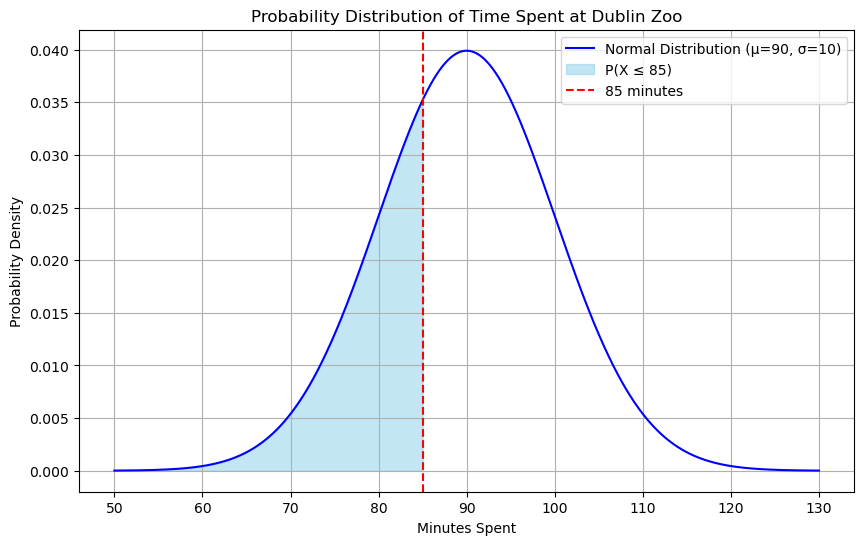

In [25]:
from scipy.stats import norm

mu = 90
sigma = 10

x = np.linspace(50, 130, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='Normal Distribution (µ=90, σ=10)')

x_fill = np.linspace(50, 85, 1000)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color='skyblue', alpha=0.5, label='P(X ≤ 85)')

plt.axvline(85, color='red', linestyle='--', label='85 minutes')

plt.title('Probability Distribution of Time Spent at Dublin Zoo')
plt.xlabel('Minutes Spent')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

plt.show()

The mean (mu) time spent at the zoo is 90 minutes, with a standard deviation (sigma) of 10 minutes. The graph illustrates the normal distribution for these parameters, where the curve represents the probability of different visit times.

The light blue shaded area on the graph corresponds to the cumulative probability that a visitor will spend a maximum of 85 minutes at the zoo, which corresponds to 30.85%.

This representation follows the normal distribution, one of the most important in statistics, also known as Gaussian distribution. It is widely used to model continuous variables that are concentrated around a mean, with a symmetric dispersion defined by the standard deviation.


- ## If a visitor is selected at random, find the probability that they will spend at least 100 minutes visiting the zoo.

- mean = in minutes
- std_dev = in minutes
- x = Value to find the probability for

In [26]:
mean = 90  
std_dev = 10  
x = 100  

prob_less_than_100 = stats.norm.cdf(x, mean, std_dev)

prob_at_least_100 = 1 - prob_less_than_100

print(f"The probability that a visitor will spend at least {x} minutes at Dublin Zoo is approximately {prob_at_least_100:.4f} or {prob_at_least_100 * 100:.2f}%.")

The probability that a visitor will spend at least 100 minutes at Dublin Zoo is approximately 0.1587 or 15.87%.


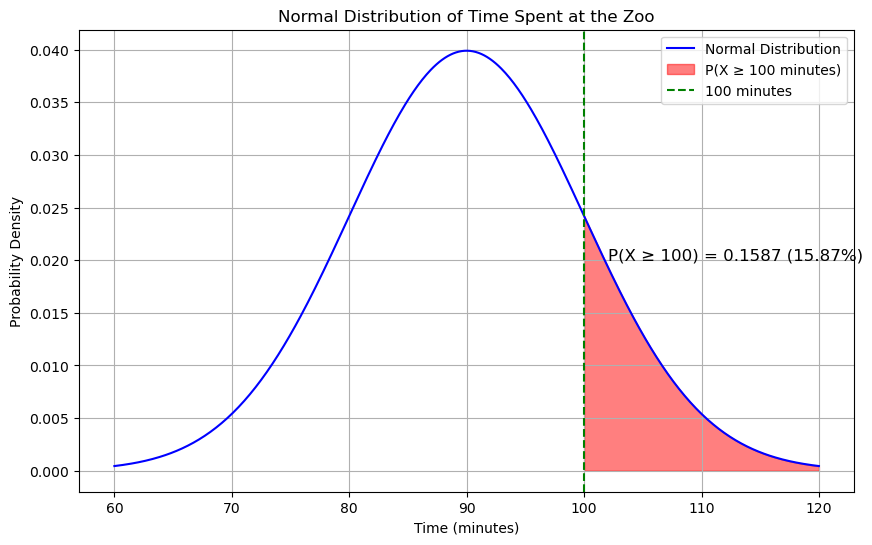

In [27]:
mean = 90  
std_dev = 10  

x = np.linspace(60, 120, 500)  
y = stats.norm.pdf(x, mean, std_dev)  

x_fill = np.linspace(100, 120, 500)
y_fill = stats.norm.pdf(x_fill, mean, std_dev)
probability = 1 - stats.norm.cdf(100, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='P(X ≥ 100 minutes)')
plt.axvline(x=100, color='green', linestyle='--', label='100 minutes')
plt.title('Normal Distribution of Time Spent at the Zoo')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

plt.text(102, 0.02, f'P(X ≥ 100) = {probability:.4f} ({probability*100:.2f}%)', fontsize=12, color='black')

plt.show()

The mean (mu) time spent at the zoo is 90 minutes, with a standard deviation (sigma) of 10 minutes. The graph illustrates the normal distribution for these parameters, where the curve represents the probability of different visit times.

The red shaded area on the graph corresponds to the cumulative probability that a visitor will spend at least 100 minutes at the zoo, which is equivalent to 15.87%

This representation follows the normal distribution, one of the most important in statistics, also known as Gaussian distribution. It is widely used to model continuous variables that are concentrated around a mean, with a symmetric dispersion defined by the standard deviation.

- ## Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is the probability that they have spent more than 100 minutes there?

- mean = 90  Mean in minutes
- std_dev = 10  Standard deviation in minutes
- x1 = 100   Value for the upper limit
- x2 = 90    Value for the lower limit

In [28]:
import scipy.stats as stats

mean = 90  
std_dev = 10  
x1 = 100  
x2 = 90   

# Calculate probabilities
prob_greater_than_100 = 1 - stats.norm.cdf(x1, mean, std_dev)
prob_greater_than_90 = 1 - stats.norm.cdf(x2, mean, std_dev)

# Calculate conditional probability
conditional_probability = prob_greater_than_100 / prob_greater_than_90

print(f"The probability that a visitor who spent more than 90 minutes has spent more than 100 minutes is approximately {conditional_probability:.4f} or {conditional_probability * 100:.2f}%.")

The probability that a visitor who spent more than 90 minutes has spent more than 100 minutes is approximately 0.3173 or 31.73%.


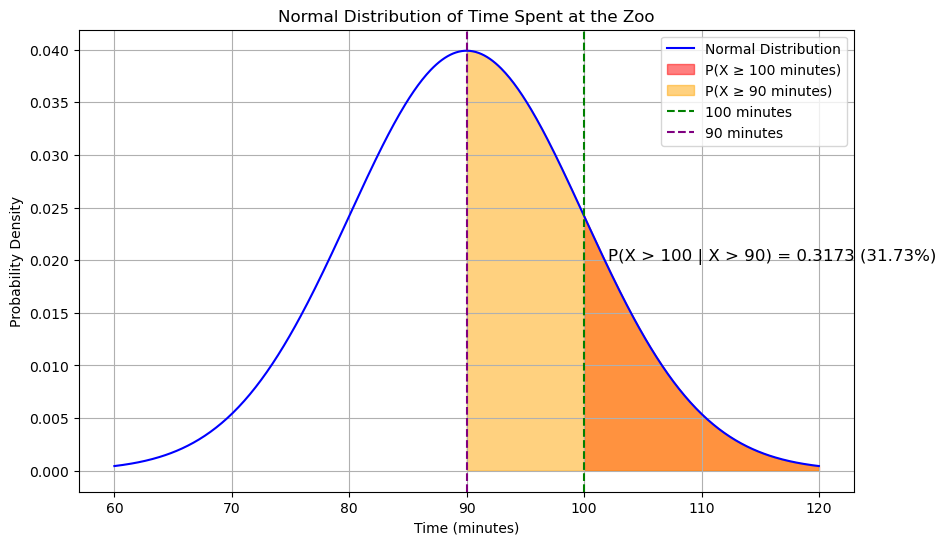

In [29]:
x = np.linspace(60, 120, 500)  
y = stats.norm.pdf(x, mean, std_dev)  

prob_greater_than_100 = 1 - stats.norm.cdf(x1, mean, std_dev)

prob_greater_than_90 = 1 - stats.norm.cdf(x2, mean, std_dev)

conditional_probability = prob_greater_than_100 / prob_greater_than_90

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

x_fill_100 = np.linspace(100, 120, 500)
y_fill_100 = stats.norm.pdf(x_fill_100, mean, std_dev)
plt.fill_between(x_fill_100, y_fill_100, color='red', alpha=0.5, label='P(X ≥ 100 minutes)')

x_fill_90 = np.linspace(90, 120, 500)
y_fill_90 = stats.norm.pdf(x_fill_90, mean, std_dev)
plt.fill_between(x_fill_90, y_fill_90, color='orange', alpha=0.5, label='P(X ≥ 90 minutes)')

plt.axvline(x=x1, color='green', linestyle='--', label='100 minutes')
plt.axvline(x=x2, color='purple', linestyle='--', label='90 minutes')

plt.title('Normal Distribution of Time Spent at the Zoo')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

plt.text(102, 0.02, f'P(X > 100 | X > 90) = {conditional_probability:.4f} ({conditional_probability * 100:.2f}%)',
         fontsize=12, color='black')

plt.show()

The mean (mu) time spent at the zoo is 90 minutes, with a standard deviation (sigma) of 10 minutes. The graph illustrates the normal distribution for these parameters, where the curve represents the probability of different visit times.

The orange shaded area on the graph corresponds to the cumulative probability that a visitor will spend at least 100 minutes at the zoo. The yellow shaded area represents the cumulative probability that a visitor will spend at least 90 minutes at the zoo.

Furthermore, the probability that a visitor who spent more than 90 minutes stayed more than 100 minutes is approximately 0.3173 or 31.73%.

The resulting graph will show the curve of the normal distribution with areas shaded in yellow and orange, representing the probabilities of spending more than 100 minutes and more than 90 minutes at the zoo, respectively.

## 3.1 Conclusion of Task 3 - Probability (Continuous)

Analysis of the time spent by visitors at Dublin Zoo revealed that this time follows a normal distribution, with a mean (mu) of 90 minutes and standard deviation (sigma) of 10 minutes. During the study, we calculated the probability of a visitor spending a maximum of 85 minutes and staying at least 100 minutes at the zoo. We also look at the conditional probability that, given that a visitor has already spent more than 90 minutes, they have spent more than 100 minutes.

This analysis not only answered the proposed questions but also justified the decisions made using the cumulative distribution function (CDF) and the probability density function (PDF) of the normal distribution. The graphs generated helped to visualize the areas corresponding to the probabilities, making the interpretation of the data clearer and more intuitive. Furthermore, the analysis illustrates the importance of normal statistical distribution and its practical application in real-world scenarios.

# 4. References
1. Bishop, C.M. (2006). *Pattern Recognition and Machine Learning*. New York: Springer.

2. Hastie, T., Tibshirani, R. and Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. 2nd ed. New York: Springer.

3. Iglewicz, B. and Hoaglin, D.C. (1993). *How to Detect and Handle Outliers*. New York: Sage Publications.

4. Jolliffe, I.T. (2002). *Principal Component Analysis*. 2nd ed. New York: Springer.

5. Kelleher, J.D. and Tierney, B. (2018). *Data Science: An Introduction*. 1st ed. London: The MIT Press.

6. Kuhn, M. and Johnson, K. (2013). *Applied Predictive Modeling*. New York: Springer.

7. Irish Government Data Repository. (n.d.). *Data.gov.ie*. Available at: [https://data.gov.ie/](https://data.gov.ie/) (Accessed: 21 October 2024). 2024).
8. Dummies. (n.d.). How to use the Z-table. Available at: [https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-use-the-z-table-147241/] (Accessed 26 Oct. 2024)
